## INFO284 Machine learning semester assignment, spring 2022

## Introduction

The dataset "albums_all.csv" is a record of 2833 albums from Spotify. With this dataset, we wish to create four different machine learning models to predict the popularity of the albums based on the features from the dataset. As the dataset is primarily numeric, we will create models based on regression. Using LASSO, Random Forest Regressor, KNN Regressor and Support Vector Regressor.

For the second part of the assignment, we will create a home-made convolutional neural network. This model will predict popularity, average tempo, average energy and release date based on album covers. 

## **A)**  Tabular album data
### **1**
**1.1** Loading the dataset. 

Importing pandas, because we need a library that can analyze our dataset. In addition to this, we also need to import warnings, because our program, whilst running, got warning messages. This may be because our program uses an obsolete module (Python, 2022).

In [241]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import timeit

To start the process, we need our program to read the csv file, which is our dataset. To manage this, we need to use pandas, shortened as pd. After that, we sort the values after id - the ids are in chronical order.

**1.2** Creating grid.

Afterwards, a grid will be created. This grid shows all the features in the csv file. For example t_name0 shows the name of the first song in that album, t_dur0 show the songs duration in milliseconds etc. Since we can see the features now, we can easily manipulate the grid in order to sort out the important features and the unimportant features. 

In [242]:
df = pd.read_csv("albums_all.csv")
df.sort_values('id')

,name,id,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
1554,Nibiru,1,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.1580,0.5980,0.4840,173.023,96.042,148.019,4.0,4.0,4.0,67
443,Club Future Nostalgia (DJ Mix),15,2020-08-28,"Dua Lipa, The Blessed Madonna,",17,Future Nostalgia (Joe Goddard Remix) [Mixed],Cool (Jayda G Remix) [Mixed],Good In Bed (Zach Witness & Gen Hoshino Remixe...,174240,126373.0,...,0.6070,0.6480,0.3790,122.978,122.913,93.888,4.0,4.0,4.0,56
458,"Come Over When You're Sober, Pt. 2",21,2018-11-09,"Lil Peep,",13,Broken Smile (My All),Runaway,Sex with My Ex,280520,192760.0,...,0.1150,0.1750,0.4700,120.044,79.892,167.892,4.0,3.0,4.0,77
967,Hollywood's Bleeding,36,2019-09-06,"Post Malone,",17,Hollywood's Bleeding,Saint-Tropez,Enemies (feat. DaBaby),156266,150866.0,...,0.1700,0.2950,0.6670,130.218,132.113,76.388,4.0,4.0,4.0,86
578,Djesse Vol. 1,48,2018-12-07,"Jacob Collier, Metropole Orkest, Jules Buckley,",9,Home Is,Overture,With The Love In My Heart,345270,174345.0,...,0.0335,0.1690,0.1260,104.279,114.161,122.981,4.0,4.0,1.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,Jurassic Shift,159747,1993-01-01,"Ozric Tentacles,",9,Sunhair,Stretchy,Feng Shui,343266,411533.0,...,0.7140,0.7350,0.5120,135.078,150.048,148.096,3.0,4.0,4.0,20
2592,World of Warcraft: Wrath of the Lich King Orig...,159822,2008-11-13,"Various Artists,",21,Wrath of the Lich King (Main Title),Dragons' Rest,"Arthas, My Son (Cinematic Intro)",536653,187533.0,...,0.0502,0.0313,0.0986,79.892,81.045,93.347,3.0,4.0,1.0,47
1695,PBP,159845,2021-07-16,"Proof,",11,Pas un centime,PGP,Sahara,250538,222720.0,...,0.0784,0.6300,0.4210,130.768,142.011,142.084,4.0,4.0,4.0,35
1069,Inspiron,159942,2020-10-23,"XDB,",9,Prelude,Moveya,Endo,72214,334292.0,...,0.0392,0.3090,0.2670,85.928,118.983,124.003,4.0,4.0,4.0,4


**1.3** Data types and features

df.info() shows the data type of each feature and number of non-values there are for each feature.

As you can see below, there are mostly numeric values (int64 and float64). except from "name", "release_date", "artists" and "track_name0, 1 and 2". In section 1.6 we will check for outliers.

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2833 non-null   object 
 1   id            2833 non-null   int64  
 2   release_date  2833 non-null   object 
 3   artists       2833 non-null   object 
 4   total_tracks  2833 non-null   int64  
 5   t_name0       2833 non-null   object 
 6   t_name1       2833 non-null   object 
 7   t_name2       2833 non-null   object 
 8   t_dur0        2833 non-null   int64  
 9   t_dur1        2833 non-null   float64
 10  t_dur2        2833 non-null   float64
 11  t_dance0      2833 non-null   float64
 12  t_dance1      2833 non-null   float64
 13  t_dance2      2833 non-null   float64
 14  t_energy0     2833 non-null   float64
 15  t_energy1     2833 non-null   float64
 16  t_energy2     2833 non-null   float64
 17  t_key0        2833 non-null   float64
 18  t_key1        2833 non-null 

Many of the features in the data set is information about the albums, such as name of the album, ID, Release date and Artists. Since the name of the album uses ID to identify it as well, and do not say anything on their own, we will be removing this later. The other features are about the tracks, how popular they are, the songs tempo, level of acoustics, how danceable it is and so on. We kept these features to predict the popularity of the albums later on. 

**1.4** Cleaning the dataset

Checking for duplicates. There are none.

In [244]:
sum(df.duplicated(df.columns))

0

Checking again for non-values, to be sure there are none.

In [245]:
df.isna().sum()

name            0
id              0
release_date    0
artists         0
total_tracks    0
t_name0         0
t_name1         0
t_name2         0
t_dur0          0
t_dur1          0
t_dur2          0
t_dance0        0
t_dance1        0
t_dance2        0
t_energy0       0
t_energy1       0
t_energy2       0
t_key0          0
t_key1          0
t_key2          0
t_mode0         0
t_mode1         0
t_mode2         0
t_speech0       0
t_speech1       0
t_speech2       0
t_acous0        0
t_acous1        0
t_acous2        0
t_ins0          0
t_ins1          0
t_ins2          0
t_live0         0
t_live1         0
t_live2         0
t_val0          0
t_val1          0
t_val2          0
t_tempo0        0
t_tempo1        0
t_tempo2        0
t_sig0          0
t_sig1          0
t_sig2          0
popularity      0
dtype: int64

As there are values within "release_date" which only contains year of release, we chose to only keep release *year*. Hence we take the 4 first values of df[['release']]

In [246]:
df['release_date'] = df['release_date'].apply(lambda x : x[:4])

Since ID represents the row, and is easier to work with than a text string of the album - we remove df[['name']]. We will also remove track names, as we figured them to be of little importance for predictions.

In [247]:
df = df.drop(["name", "t_name0", "t_name1", "t_name2"], axis=1)

df1 will be used in heatmap in section 2.1

In [248]:
df1 = df

**1.5** Dummy variables of Artists in the dataset

Get_dummies is a method to convert categorical features into binary vector arrays. Much the same as OneHotEncoder, but with one column less (k-1) (Chen, 2020). 

As the dataset is primarily a numeric dataset, we will convert remaining categorical features into numeric ones.
 
We figure artists are important for an albums *popularity*, hence we use pd.get_dummies() to preprocess the categorical feature names: artists in the dataset.

In [249]:
df = pd.get_dummies(df, columns=['artists'], drop_first=True)
df

,id,release_date,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,...,"artists_夏之禹, FBR,","artists_安溥 anpu,","artists_屁孩 Ryan,","artists_岸県子,","artists_椿鬼奴,","artists_楊秀蘭, 歐陽謙, 史志有,","artists_水中スピカ,","artists_神前 暁,","artists_路嘉欣,","artists_박혜진 Park Hye Jin,"
0,22352,2000,4,292720,293760.0,292733.0,0.549,0.623,0.5190,0.559,...,0,0,0,0,0,0,0,0,0,0
1,106534,2011,12,213760,181000.0,245973.0,0.871,0.702,0.4160,0.854,...,0,0,0,0,0,0,0,0,0,0
2,23608,2019,59,157124,130446.0,152450.0,0.289,0.328,0.2340,0.936,...,0,0,0,0,0,0,0,0,0,0
3,8655,2020,8,127896,176351.0,166968.0,0.886,0.947,0.8260,0.818,...,0,0,0,0,0,0,0,0,0,0
4,49670,2018,17,210320,226253.0,211880.0,0.724,0.791,0.7840,0.827,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,33980,2018,10,70740,262400.0,220680.0,0.224,0.609,0.7110,0.348,...,0,0,0,0,0,0,0,0,0,0
2829,110832,2010,10,252226,222400.0,214973.0,0.526,0.623,0.4820,0.293,...,0,0,0,0,0,0,0,0,0,0
2830,14491,2008,11,269146,251560.0,172760.0,0.551,0.756,0.7820,0.901,...,0,0,0,0,0,0,0,0,0,0
2831,123511,2003,13,344764,425613.0,249652.0,0.473,0.572,0.8230,0.146,...,0,0,0,0,0,0,0,0,0,0


As the dataset is quite clean in its original state, there will be little altercations. As aforementioned there are no NaN or duplicates. After dropping "name", "track_name0, 1 and 2", altering "release_date" to release year and calling get_dummies in "artists". There are no more categorical features (we will change "release_date" to int64 in section 1.6).

**1.6** Handling outliers

To protect the integrity of the dataset, when handling outliers, we were careful not to remove too many of them. Because then our modules would not be able to get the more unusual data. However, we still needed to remove some outlier data in order to generalize the data. 

Boxplot of Track Duration

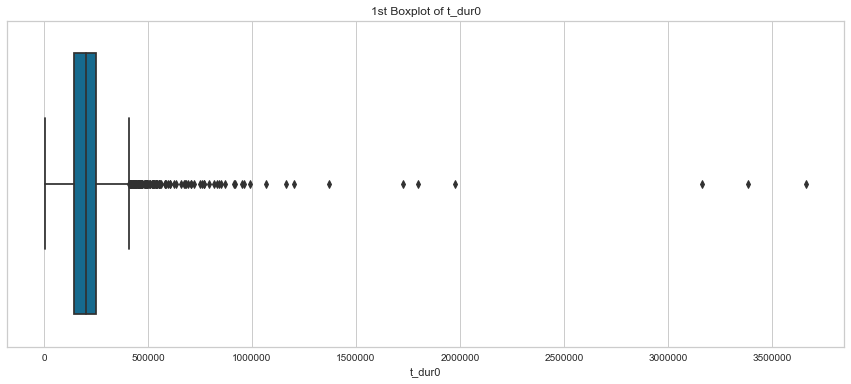

In [251]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_dur0', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of t_dur0")
plt.show()

We removed outliers above 1 000 000  and below 10 000.

In [252]:
df = df[(df['t_dur0'] > 10000) & (df['t_dur0'] < 1000000)]

Making a 2nd boxplot to view the data we have removed.  


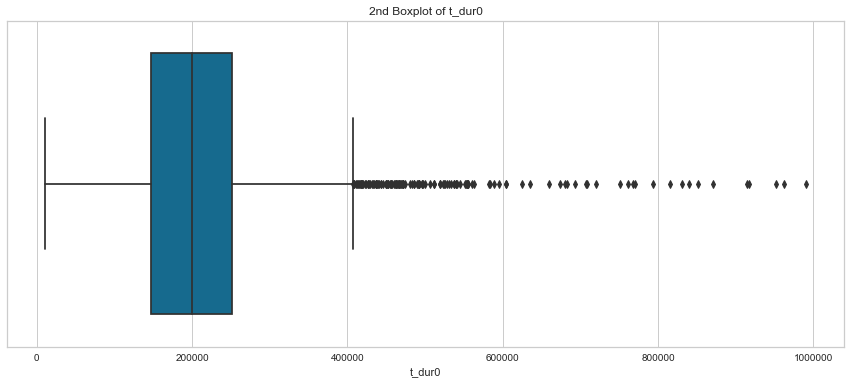

In [253]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_dur0', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of t_dur0")
plt.show()

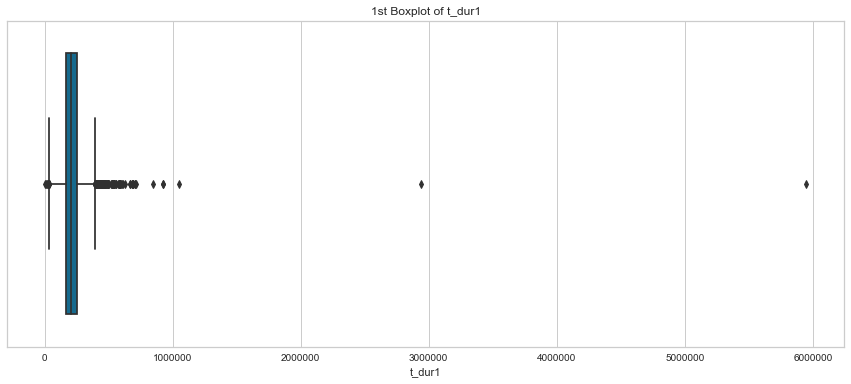

In [254]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_dur1', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of t_dur1")
plt.show()

Checking if there are any values smaller or the same as 25 000. Reason we where checking for 25 000, was because we tried several numbers and found out that 25 000 was the number that had a few outliers, that we wanted to remove. 

In [255]:
df.loc[df['t_dur1'] <= 25000]

,id,release_date,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,...,"artists_夏之禹, FBR,","artists_安溥 anpu,","artists_屁孩 Ryan,","artists_岸県子,","artists_椿鬼奴,","artists_楊秀蘭, 歐陽謙, 史志有,","artists_水中スピカ,","artists_神前 暁,","artists_路嘉欣,","artists_박혜진 Park Hye Jin,"
725,1558,1999,20,35586,23480.0,33346.0,0.255,0.455,0.222,0.993,...,0,0,0,0,0,0,0,0,0,0
1441,7209,2006,18,59666,22720.0,157573.0,0.640,0.580,0.864,0.568,...,0,0,0,0,0,0,0,0,0,0
1707,87348,2020,7,88446,5580.0,311281.0,0.701,0.000,0.627,0.560,...,0,0,0,0,0,0,0,0,0,0
1887,126622,2019,44,47558,10744.0,90675.0,0.629,0.000,0.671,0.294,...,0,0,0,0,0,0,0,0,0,0


We removed outliers above 750 000 and below 25 000, as we discussed above. 

In [256]:
df = df[(df['t_dur1'] > 25000) & (df['t_dur1'] < 750000)]

Making a 2nd boxplot to view the data we removed.  

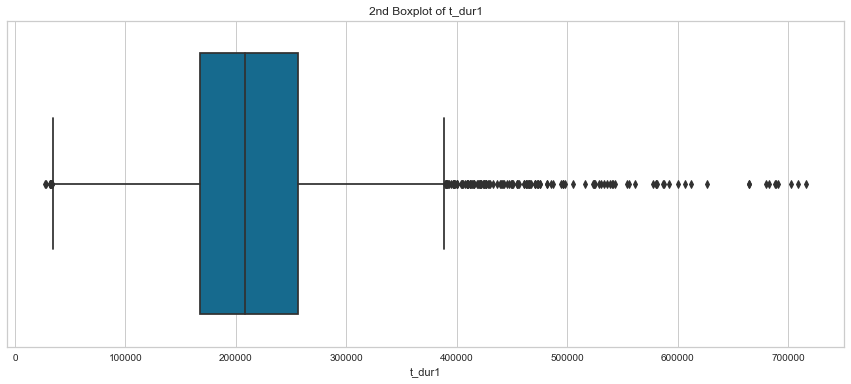

In [257]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_dur1', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of t_dur1")
plt.show()

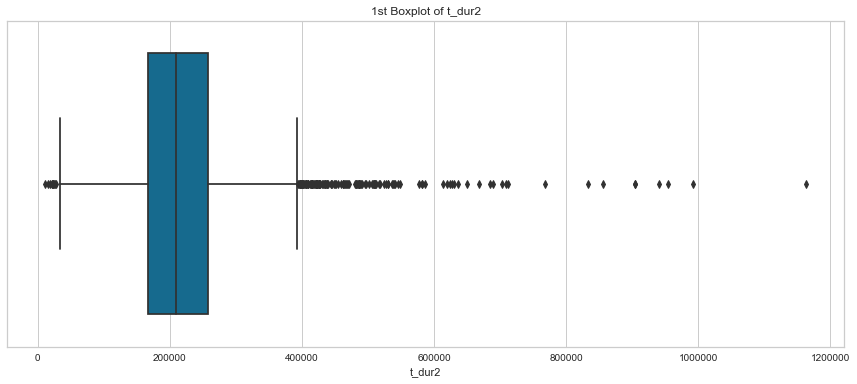

In [258]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_dur2', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of t_dur2")
plt.show()

We removed outliers above 800 000 and below 20 000, as there seems to be a few values below 30 000 ms.

In [259]:
df = df[(df['t_dur2'] > 20000) & (df['t_dur2'] < 800000)]

Then we made a 2nd plot to see the changes, after removing outliers.

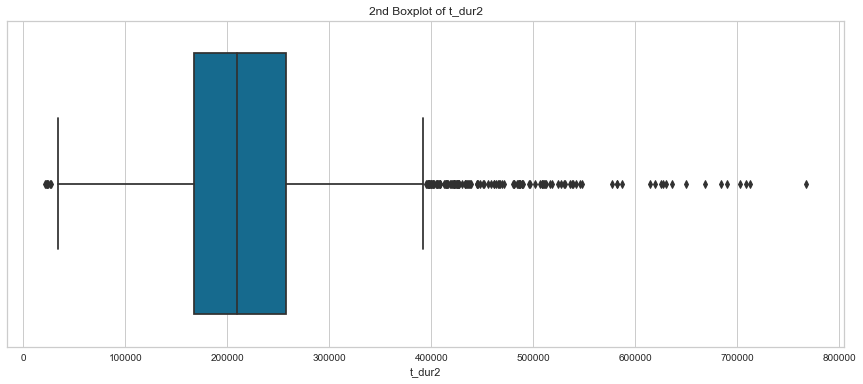

In [260]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_dur2', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of t_dur2")
plt.show()

Boxplot of Total Tracks

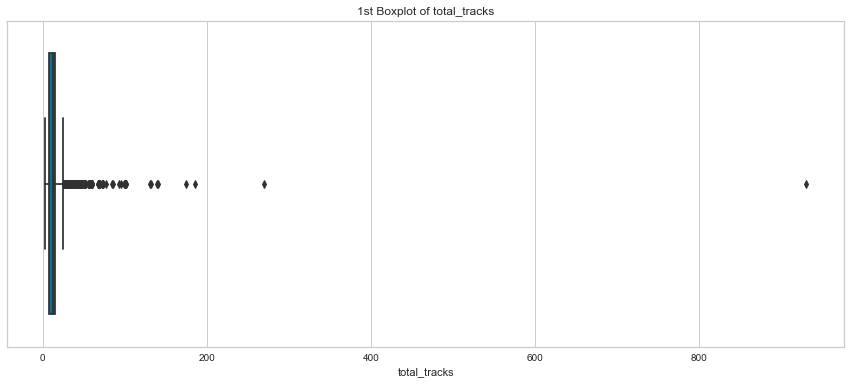

In [261]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='total_tracks', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of total_tracks")
plt.show()

We removed the rows with a total_tracks value over 150 and under 0. 

In [262]:
df = df[(df['total_tracks'] > 0) & (df['total_tracks'] < 150)]

Plotting the 2nd boxplot.

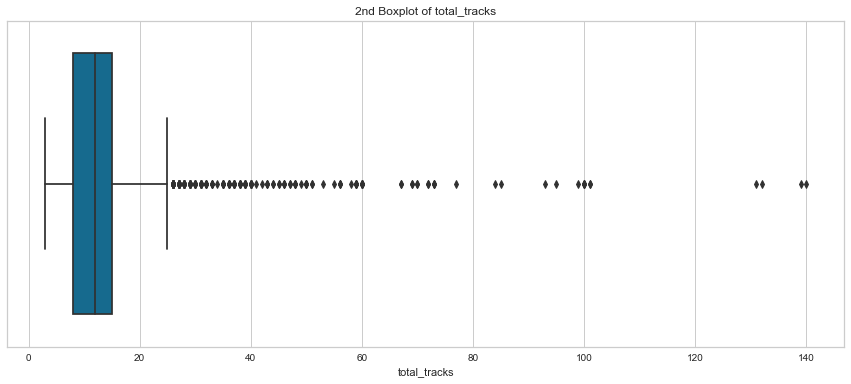

In [263]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='total_tracks', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of total_tracks")
plt.show()

Boxplot of Track Tempo

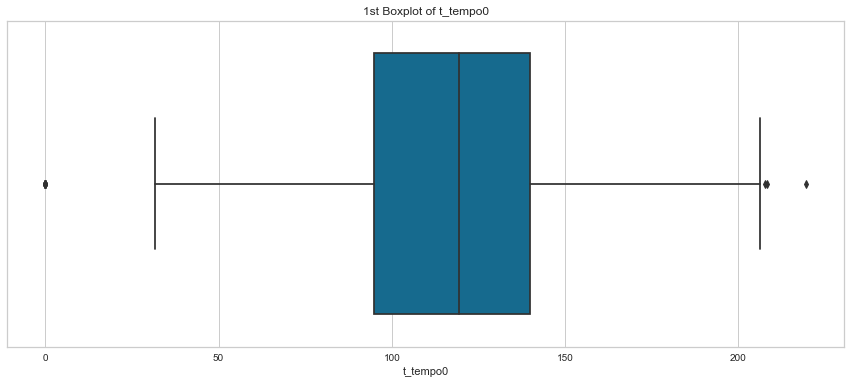

In [264]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_tempo0', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of t_tempo0")
plt.show()

Removing outliers under 0 and over 250. 

In [265]:
df = df[(df['t_tempo0'] > 0) & (df['t_tempo0'] < 250)]

The 2nd Boxplot.

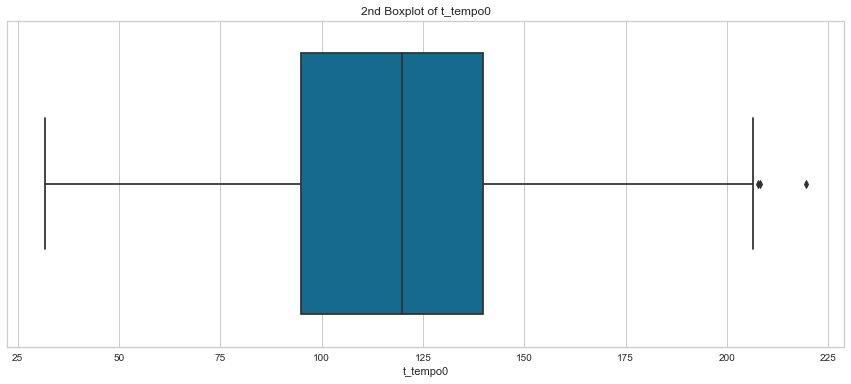

In [266]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_tempo0', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of t_tempo0")
plt.show()

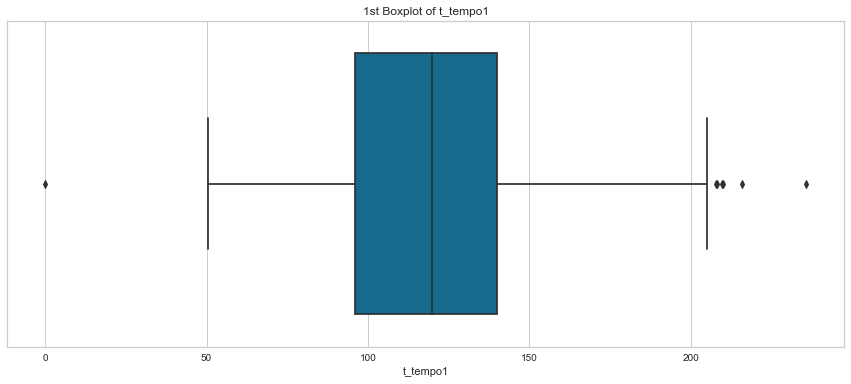

In [267]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_tempo1', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of t_tempo1")
plt.show()

Removing same values as tempo0. Everything under 0 and over 250.

In [268]:
df = df[(df['t_tempo1'] > 0) & (df['t_tempo1'] < 250)]

The 2nd Boxplot

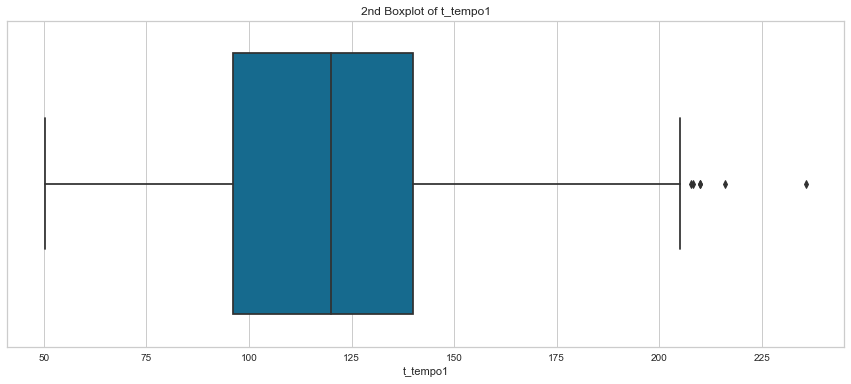

In [269]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_tempo1', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of t_tempo1")
plt.show()

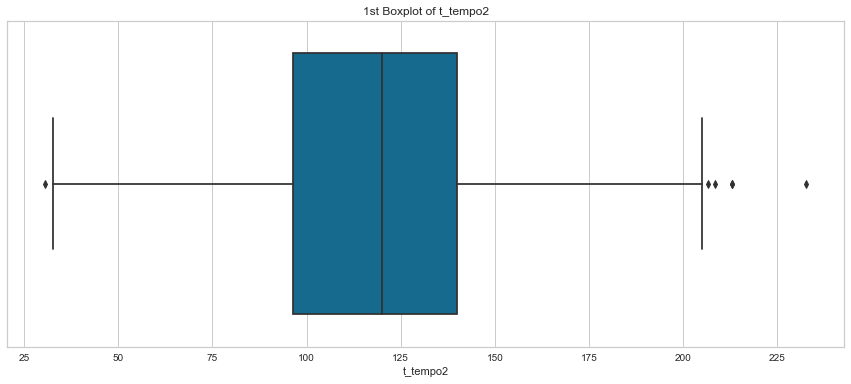

In [270]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_tempo2', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of t_tempo2")
plt.show()

We are removing the same values as above, because the values had almost the same layout. And needed to be cleaned. 

In [271]:
df = df[(df['t_tempo2'] > 0) & (df['t_tempo2'] < 250)]

Boxplot 2.

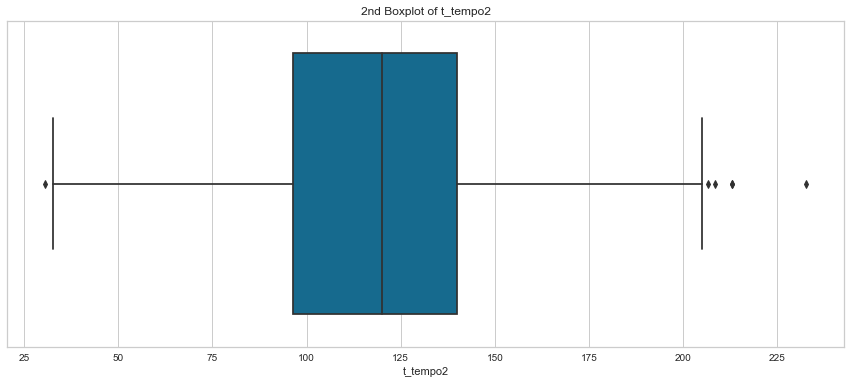

In [272]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='t_tempo2', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of t_tempo2")
plt.show()

Boxplot of Release Date

First we had some trouble running the Boxplot of release_date. Therefore, we had to change the type from object to integer because of the Error message: TypeError: Horizontal orientation requires numeric "x" variable. 

In [273]:
df['release_date'] = df['release_date'].astype('int64')

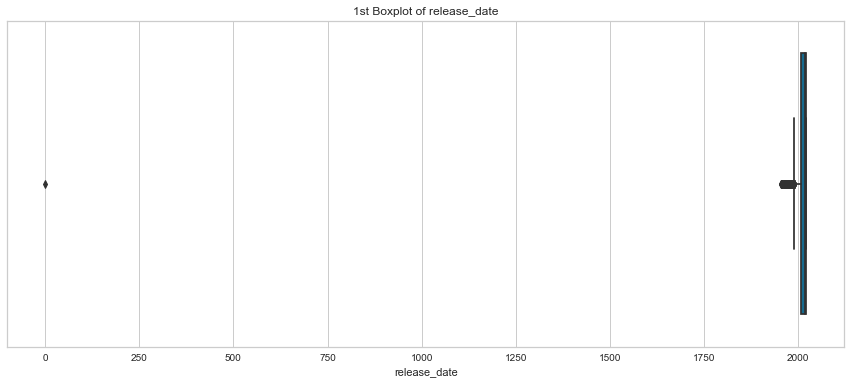

In [274]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='release_date', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("1st Boxplot of release_date")
plt.show()

Removing outliers of release date under 1800 and over 2022.

In [275]:
df = df[(df['release_date'] > 1800) & (df['release_date'] < 2022)]

2nd Boxplot

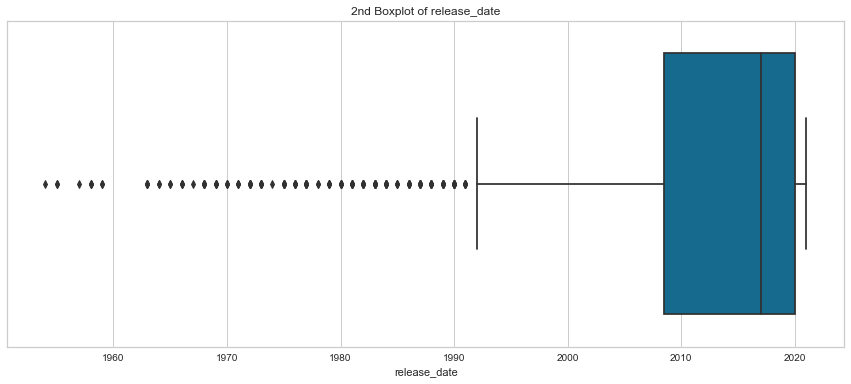

In [276]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='release_date', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("2nd Boxplot of release_date")
plt.show()

### **2** Visualizing the data we are working with
**2.1** Correlation plot

Visualizing the correlation matrix, coloring the background according to the correlation coefficients between variables. The heatmap is showing us how the different features correlate. It helps us to find patterns and gives us a perspective of depth (Pydata, 2022).

In [277]:
data = df1

correlation_plot = data.corr() # Compute pairwise correlation of columns from the df.
correlation_plot.style.background_gradient(cmap='coolwarm', axis=None) # Plot the data and setting the colour of the correlation matrix.

,id,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
id,1.000000,-0.027754,0.008656,0.036968,0.031504,-0.026355,-0.001789,0.000681,-0.019916,-0.004064,-0.005775,0.008882,0.015964,-0.002450,-0.020906,-0.013424,-0.017096,0.006743,0.009544,0.018900,0.059529,0.022297,0.047911,0.057373,0.063844,0.056743,0.019339,0.011344,-0.014316,0.008431,0.015156,0.032852,-0.001297,0.000617,0.002262,-0.041879,-0.003614,0.017398,-0.253561
total_tracks,-0.027754,1.000000,-0.062516,0.019867,-0.015322,-0.059260,-0.059348,-0.054281,-0.075200,-0.061076,-0.067875,0.008447,0.010330,0.013653,-0.007838,-0.002657,0.004940,0.115617,0.117793,0.136216,0.082319,0.080573,0.075009,0.026069,0.025562,0.017757,0.046025,0.009020,0.039200,0.023836,0.015051,0.024551,0.016933,-0.048845,-0.019779,-0.063627,-0.058912,0.004617,0.055853
t_dur0,0.008656,-0.062516,1.000000,0.488271,0.466070,-0.122604,-0.171823,-0.185570,-0.001110,-0.070526,-0.065408,-0.000223,0.031814,0.007819,-0.034515,-0.000891,-0.011621,-0.124429,-0.080407,-0.084466,0.002626,0.101183,0.096922,0.050895,0.083471,0.073200,-0.015607,0.027745,0.009643,-0.086551,-0.107600,-0.106250,0.007964,-0.032638,-0.029588,0.050840,-0.037578,-0.029837,-0.052885
t_dur1,0.036968,0.019867,0.488271,1.000000,0.733632,-0.105042,-0.123532,-0.118182,-0.020909,-0.020909,-0.019729,-0.020565,0.037907,0.018884,-0.039974,0.004917,-0.007190,-0.076915,-0.077097,-0.077504,0.036478,0.052498,0.060266,0.043019,0.054749,0.044116,0.016670,0.022773,0.020477,-0.049024,-0.084869,-0.064974,-0.011106,-0.013197,-0.039309,0.021285,0.005725,0.000070,-0.046058
t_dur2,0.031504,-0.015322,0.466070,0.733632,1.000000,-0.109994,-0.129735,-0.155260,-0.017992,-0.013709,-0.012496,-0.020899,0.023454,0.023935,-0.040471,-0.011107,-0.006295,-0.088213,-0.086134,-0.136652,0.011486,0.037938,0.020221,0.063619,0.078292,0.067123,0.000256,0.029398,0.009819,-0.057442,-0.069139,-0.115064,-0.004348,-0.012784,-0.039324,0.012222,0.001833,0.006489,-0.056048
t_dance0,-0.026355,-0.059260,-0.122604,-0.105042,-0.109994,1.000000,0.631541,0.605970,0.177335,0.131038,0.128307,0.031269,-0.008146,0.031513,-0.048495,-0.046118,-0.062179,0.211470,0.188501,0.163185,-0.253235,-0.197331,-0.203174,-0.266484,-0.222790,-0.216136,-0.161330,-0.110871,-0.114729,0.480693,0.326735,0.312633,0.080757,0.050089,0.063301,0.229628,0.131708,0.132268,-0.006613
t_dance1,-0.001789,-0.059348,-0.171823,-0.123532,-0.129735,0.631541,1.000000,0.649472,0.128732,0.178725,0.141807,-0.006270,0.021058,0.003994,-0.034978,-0.068349,-0.050152,0.222326,0.220044,0.190729,-0.178815,-0.243411,-0.220432,-0.268307,-0.259359,-0.258962,-0.103836,-0.144144,-0.124050,0.313391,0.458649,0.305252,0.063958,-0.012048,0.040317,0.084748,0.210627,0.179532,0.021690
t_dance2,0.000681,-0.054281,-0.185570,-0.118182,-0.155260,0.605970,0.649472,1.000000,0.138564,0.173243,0.205005,0.027378,0.018022,0.028007,-0.037998,-0.066579,-0.083720,0.227547,0.230955,0.221250,-0.184349,-0.226366,-0.265433,-0.279984,-0.271639,-0.282799,-0.081138,-0.087104,-0.133064,0.308151,0.330936,0.480709,0.065594,0.063653,-0.000050,0.064625,0.138909,0.221097,0.050331
t_energy0,-0.019916,-0.075200,-0.001110,-0.020909,-0.017992,0.177335,0.128732,0.138564,1.000000,0.697616,0.671110,0.011031,0.031106,0.009031,-0.049784,-0.044425,-0.029386,0.007443,-0.006649,-0.021448,-0.658399,-0.535453,-0.492847,-0.287067,-0.274864,-0.230657,0.151989,0.130868,0.098530,0.334330,0.237767,0.254437,0.205279,0.141527,0.148943,0.168552,0.115615,0.091517,0.066504
t_energy1,-0.004064,-0.061076,-0.070526,-0.020909,-0.013709,0.131038,0.178725,0.173243,0.697616,1.000000,0.711301,0.039065,0.016477,-0.006676,-0.054011,-0.061080,-0.037359,0.055180,0.055172,0.041286,-0.519451,-0.663565,-0.526710,-0.289707,-0.311633,-0.303215,0.154356,0.179993,0.12

As the heatmap shows us, there is little to no correletion between most features (features to features and features to target). therefore, we have chosen to keep almost every feature except from "track_names" and "name".

**2.2** Distribution of popularity

Visualizing the distribution of the popularity column in a histogram, since it is the prediction target. The histogram shows the frequency of values in the popularity column, by grouping the data into equal-sized intervals. It gives us an idea of the distribution of the data. 
It is not normally distributed, it is significally right skewed (Rovnik, 2019)  

<AxesSubplot:>

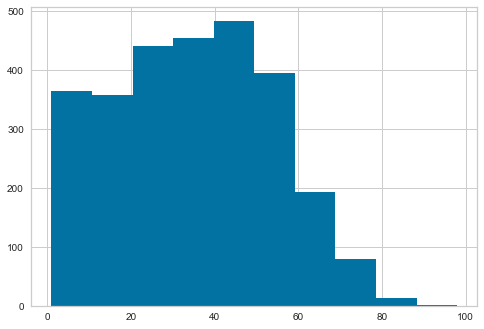

In [278]:
df['popularity'].hist()

In [279]:
df['popularity'].mean()

34.88916876574307

### **3** Testing models
**3.1** Train test split

"Train-Test-split is a technique to evaluate the performance of your machine learning model — classification or regression alike. You take a given dataset and divide it into three subsets." (Agrawal, 2021).

Splitting the dataset into training and testing set.

We will try different scalers to the modules to see which scaler performce best to the given model. We will also try without scalers.

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

y = df["popularity"]
X = df.drop(["popularity"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [281]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(2084, 2570) (2084,)
(695, 2570) (695,)


**3.2** Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where the data values are shrunk towards a central point - the average of the data values. Lasso is usually used with data sets that encourages simple and sparse models, for example our data set (Glen, 2015). Lasso is generally used when there are a lot of features, as well. As mentioned in Bjørnar Tessem´s powerpoint: "When there are a lot of features, and you expect some of them are not needed, then Lasso is a better choice" (Tessem p.21, 2022).

In [282]:
X_train_scaled = RobustScaler().fit_transform(X_train)
X_test_scaled = RobustScaler().fit_transform(X_test)

Standardscaler and Robustscaler works best and gets approximately same output for Lasso.

In [283]:
start = timeit.default_timer()
lasso = Lasso().fit(X_train_scaled, y_train)
stop = timeit.default_timer()

test_prediction = lasso.predict(X_test_scaled)

print("Training set score: {:.2f}".format(lasso.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled,y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds')

Training set score: 0.15
Test set score: 0.13
MSE: 306.78
RMSE: 17.52
------------------------------------------------
Model execution time:  0.17 Seconds


**Visualizing the lasso regressor data**

The graph underneath is a visualization the results from the Lasso regressor. The reason for this, is so that we can compare the predicitions to the "true values", and also see how well our model is perfoming. 

The second graph shows how the popularity is predicted for the Lasso regressor. It is quite interesting that it predicts in the middle almost every single time. Generally, the results are good, but the graph will sometimes "drop" substantially, thus giving a worse result. Subsequentially underfitting.

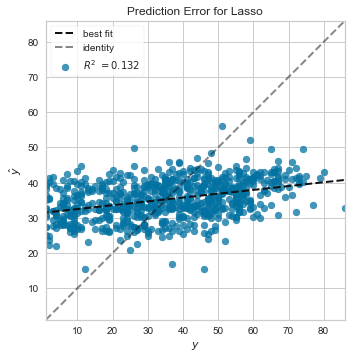

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [284]:
# https://towardsdatascience.com/visualizing-linear-ridge-and-lasso-regression-performance-6dda7affa251
# the target variable (y) and the predicted value (ŷ)
from yellowbrick.regressor import PredictionError, ResidualsPlot
#model1 = Lasso()
visualizer = PredictionError(lasso)
visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)  
visualizer.poof()

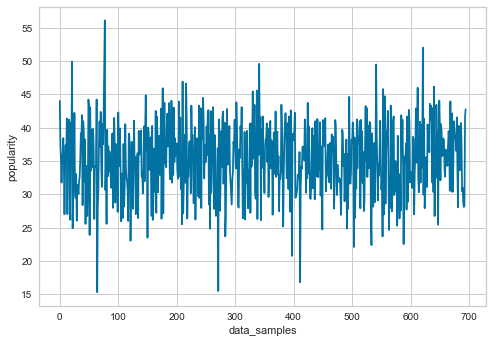

In [285]:
plt.plot(lasso.predict(X_test_scaled))
plt.xlabel('data_samples')
plt.ylabel('popularity')
plt.show()

In [286]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [287]:
alphas = np.logspace(-5, 5, 30)
tuned_parameters = [{"alpha": alphas,
                     "selection" : ["cyclic", "random"]}]

grid_lasso = GridSearchCV(lasso, tuned_parameters, cv=kfold, refit=True, n_jobs=-1)

start = timeit.default_timer()
grid_lasso.fit(X_train_scaled, y_train)
stop = timeit.default_timer()

test_prediction = grid_lasso.predict(X_test_scaled)

print("Training set score: {:.2f}".format(grid_lasso.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(grid_lasso.score(X_test_scaled,y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))

print("Best parameters: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds')

Training set score: 0.71
Test set score: 0.14
MSE: 304.79
RMSE: 17.46
Best parameters: {'alpha': 0.005736152510448681, 'selection': 'random'}
Best cross-validation score: 0.19
------------------------------------------------
Model execution time:  183.41 Seconds


**3.3** Random Forest Regressor

Random forest regressor is in short a collection of decision trees where each tree is different from on another. Quoted from SciKit: "A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting" (SciKit, 2022). The main reason for using RFR is because it provides higher accuracy through cross validation (Anurag, 2018). RFR will keep the missing values and maintain the accuracy of a large proportion of data.


In [288]:
X_train_scaled = RobustScaler().fit_transform(X_train)
X_test_scaled = RobustScaler().fit_transform(X_test)

StandardScaler, RobustScaler and without scaler gives approximately same results for RandomForestRegressor

In [289]:
forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=3)

start = timeit.default_timer()
forest.fit(X_train_scaled, y_train)
stop = timeit.default_timer()

test_prediction = forest.predict(X_test)

print("Training set score: {:.2f}".format(forest.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test_scaled,y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds') 

Training set score: 0.22
Test set score: 0.17
MSE: 355.82
RMSE: 18.86
------------------------------------------------
Model execution time:  1.6 Seconds


**Visualizing the forest regressor data**

This graph visualizes forest regressor data. This graph shows the popularity compared to the amount of data samples. Forest regressor gave us the highest score. However, it seems as the model predicts mostly around the mean of popularity (which is 34.89). Therefore, one can discuss whether or not it is the best model. 

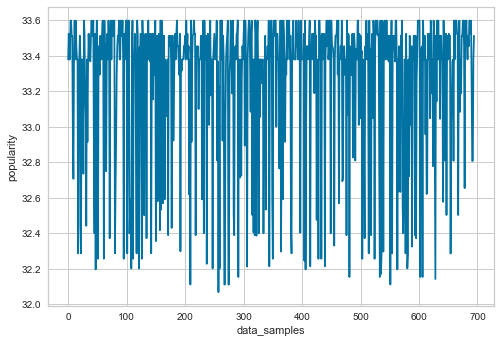

In [290]:
plt.plot(forest.predict(X_test))
plt.xlabel('data_samples')
plt.ylabel('popularity')
plt.draw()

In [291]:
param_grid = { 
    'n_estimators': [1, 10, 100], # 1000, 10 000
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : ['None',3,4,5,6,7,8],
}
grid_forest = GridSearchCV(estimator = forest, param_grid = param_grid, cv = kfold, n_jobs=-1)

start = timeit.default_timer()
grid_forest.fit(X_train, y_train)
stop = timeit.default_timer()

test_prediction = grid_forest.predict(X_test)

print("Training set score: {:.2f}".format(grid_forest.score(X_train,y_train)))
print("Test set score: {:.2f}".format(grid_forest.score(X_test,y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))

print("Best parameters: {}".format(grid_forest.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_forest.best_score_))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds')

Training set score: 0.62
Test set score: 0.22
MSE: 274.48
RMSE: 16.57
Best parameters: {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
Best cross-validation score: 0.22
------------------------------------------------
Model execution time:  73.74 Seconds


**3.4** KNN Regressor

K-Nearest Neighbor, also known as KNN, is a very simple machine learning algorithm. In short, KNN calculates the distance of a data point to all the other data training points. It is mainly used for calculating continious variables. According to Statistics Canada, "a variable is said to be continuous if it can assume an infinite number of real values within a given interval (Statistics Canada, 2021)". The distance can be Euclidian, for example. A euclidian distance, referenced in Bilal Hamada´s article, is "a euclidian distance will represent how similar two data points are - assuming some clustering based on other data has already been performed."(Hamada, 2021). After this, the algorithm will select the K, which will be any integer. Ultimately, according to Bilal Hamad´s article, the algorithm assigns the data point to the class which the majority of K data points will be found (Hamada, 2021). 

In [292]:
X_train_scaled = RobustScaler().fit_transform(X_train)
X_test_scaled = RobustScaler().fit_transform(X_test)

KNN Regressor seems to work best with robustScaler

In [293]:
neigh = KNeighborsRegressor(n_neighbors = 100)

start = timeit.default_timer()
neigh.fit(X_train_scaled, y_train)
stop = timeit.default_timer()

test_prediction = neigh.predict(X_test_scaled)

print("Training set score: {:.2f}".format(neigh.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(neigh.score(X_test_scaled,y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds')

Training set score: 0.15
Test set score: 0.14
MSE: 303.97
RMSE: 17.43
------------------------------------------------
Model execution time:  0.01 Seconds


**Visualizing the KNN regressor data**

This plot map shows the same as the other ones above. Compared to the others, it is still predicting in the middle of the graph and is generally over 20 points on "popularity". However, KNN is not giving the best results, simultaneously underfitting as one can see in the results above. It consequently "drops", hence giving us a worse result compared to the other regressors.

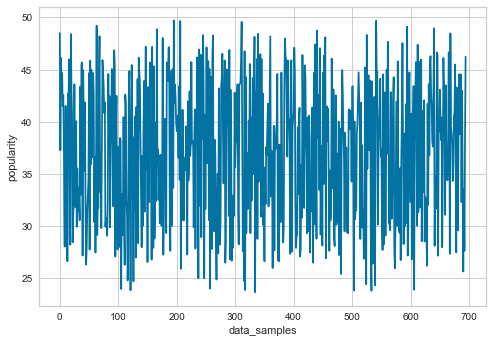

In [294]:
plt.plot(neigh.predict(X_test_scaled))
plt.xlabel('data_samples')
plt.ylabel('popularity')
plt.draw()

In [295]:
param_grid = [{'n_neighbors': [1,10,100], 
               'weights': ['uniform'], # removed "distance" as it resulted in 1.0 in training score
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

grid_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid, cv=kfold, scoring='r2', n_jobs=-1)

start = timeit.default_timer()
grid_neigh.fit(X_train_scaled, y_train)
stop = timeit.default_timer()

test_prediction = grid_neigh.predict(X_test_scaled)

print("Training set score: {:.2f}".format(grid_neigh.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(grid_neigh.score(X_test_scaled,y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))

print("Best parameters: {}".format(grid_neigh.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_neigh.best_score_))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds')

Training set score: 0.15
Test set score: 0.14
MSE: 303.97
RMSE: 17.43
Best parameters: {'algorithm': 'auto', 'n_neighbors': 100, 'weights': 'uniform'}
Best cross-validation score: 0.13
------------------------------------------------
Model execution time:  36.89 Seconds


**3.5** **SVM Regression**

SVM Regression is explained in Ashwin Raj´s article: "Support vector regression is a supervized learning algorithm that is used to predict descrete values"(Raj, 2020). Another name for SVM Regression is simply SVR (Support Vector Regression). 

Visualize a hyperplane. The part of the hyperplane that has the most dots, or the most number of points, is the best fit "line". The main idea of SVR is to simplify this data, and find the best fit "line" in a hyperplane. This line is found within a threshold value, unlike other regression models that try to minimize the errors between the real and predicted values. As mentioned in Raj´s article, "the threshold value is the distance between the hyperplane and the boundary line" (Raj, 2020). The boundary line is, in short, the outline or the outer edges of a shape or area. 

Some problems with SVR is that the functions´ fit time complexity is more quadratic which will, in simple terms, not allow the regressor to run optimally if the data set has samples over approximately 10 000.

In [296]:
X_train_scaled = RobustScaler().fit_transform(X_train)
X_test_scaled = RobustScaler().fit_transform(X_test)

SVR seem to work best with RobustScaler.

In [297]:
svmreg = svm.SVR()

start = timeit.default_timer()
svmreg.fit(X_train_scaled, y_train)
stop = timeit.default_timer()

test_prediction = svmreg.predict(X_test_scaled)

print("Training set score: {:.2f}".format(svmreg.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(svmreg.score(X_test_scaled,y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds') 

Training set score: 0.21
Test set score: 0.16
MSE: 297.40
RMSE: 17.25
------------------------------------------------
Model execution time:  7.75 Seconds


**Visualizing the SVR data**

This regressor gave us the best results. As one can see, it gives us a consecutive result throughout with little "dropping". It goes below 20 points on "popularity" three times, which is less than any other regressor earlier. The same goes for "increases". The graph stays consecutive and is within a certain point range throughout. The SVR regressor generally predicts in the middle of the graph, as well. All of these factors will, in turn, give us a better result. 

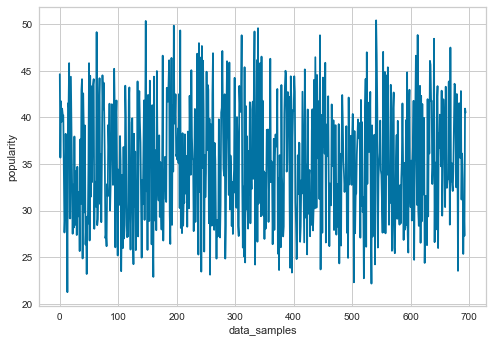

In [298]:
plt.plot(svmreg.predict(X_test_scaled))
plt.xlabel('data_samples')
plt.ylabel('popularity')
plt.draw()

In [299]:
# Excluded kernels because too long running time
parameters = [{'kernel': ['rbf'], # , 'linear' 'poly', 'sigmoid', 'precomputed'
               'C': [0.1, 1, 10],
               'gamma': [0.1, 1, 10]}]


grid_svr = GridSearchCV(svmreg, parameters, cv = kfold, return_train_score=False, n_jobs=-1)

start = timeit.default_timer()
grid_svr.fit(X_train_scaled, y_train)
stop = timeit.default_timer()

test_prediction = grid_svr.predict(X_test_scaled)

print("Training set score: {:.2f}".format(grid_svr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(grid_svr.score(X_test_scaled, y_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, test_prediction)))
print("RMSE: {:.2f}".format(mean_squared_error(y_test, test_prediction, squared=False)))

print("Best parameters: {}".format(grid_svr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svr.best_score_))
print("------------------------------------------------")
print('Model execution time: ', round(stop - start, 2), 'Seconds') 

Training set score: 0.66
Test set score: 0.17
MSE: 293.85
RMSE: 17.14
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.17
------------------------------------------------
Model execution time:  222.13 Seconds


## **B)**  Convolutional Neural Network

For this part of the assignment, we will be using another dataset. This contains images of albums from spotify.

Features for prediction: Release Date, Average Tempo, Average Energy and Popularity

Convolutional Neural Network is, in short, a deep learning algorithm that can take in different inputs. For example an image or images and assign importance to various objects or aspects in the image. This will grant the modules the ability to differentiate from one another. According to Sumit Saha´s article, the pre-processing in a ConvNet (Convolutional Network) is much lower compared to other classification methods. Quoted from Sumit Saha´s article: "While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics." (Saha, 2018). Shortly explained, ConvNets are much more advanced algorithms and have a great ability to learn and differentiate between different aspects.

## **1**
**1.1** Loading and Visualizing the dataset

The primary task is to load the images into a list of PIL files for use in torch.

In [300]:
import os

images = []
from PIL import Image
os.getcwd()
for album_id in os.listdir('./images/'):
    path = './images/'+album_id
    pil_img = Image.open(path)
    images.append([pil_img, int(album_id[:-4])])

covers_df = pd.DataFrame(images, columns=['Image', 'id'])

We then have to merge the images with the correct variables from the dataframe, and so we create the auxiliary dataframe and select the values we want to predict. We then merge the dataframe with the images to create a dataset with both images and variables.

Finally we split the data 70/30 for training and testing

In [301]:
aux_tabular_df = df[['id', 'release_date', 't_tempo0','t_tempo1','t_tempo2','t_energy0','t_energy1','t_energy2','popularity']]

aux_tabular_df['avg_tempo'] = aux_tabular_df[['t_tempo0','t_tempo1','t_tempo2']].mean(axis=1)
aux_tabular_df = aux_tabular_df.drop(['t_tempo0','t_tempo1','t_tempo2'], axis=1)

aux_tabular_df['avg_energy'] = aux_tabular_df[['t_energy0','t_energy1','t_energy2']].mean(axis=1)
aux_tabular_df = aux_tabular_df.drop(['t_energy0','t_energy1','t_energy2'], axis=1)

aux_tabular_df['id'] = aux_tabular_df['id'].astype(int)
aux_tabular_df['release_date'] = aux_tabular_df['release_date'].astype(int)

data = pd.merge(covers_df, aux_tabular_df, on='id')


#data=data[:30]
split = int(0.7*len(data))
train = data[:split]
test = data[split:]

### **2** Home-Made Convolutional Neural Network

**2.1** Network class

Torch is a package that provides two main functions: tensor computation and deep neural networks built on a tape-based autograd (pypi, 2022). Torch is generally better to use when it comes to Deep Neural Networks. It provides a faster computation than what NumPy would do, and Torch is also a replacement for NumPy to use power from the GPUs instead.

In [302]:
# %pip install torch

import torch
import torch.nn as nn
import torch.nn.functional as F
# !pip install torchvision
from torchvision import transforms

Creating our data set.

In [303]:
from torch.utils.data import Dataset, DataLoader

class AlbumCoverDataset(Dataset):
    def __init__(self, data, transform=None, target_transform=None):
        self.len = len(data)
        self.images = np.array(data['Image'].values)
        self.labels = data[['release_date','avg_energy', 'avg_tempo', 'popularity']].values
        self.ids = data['id'].values

        self.transform=transform
        self.target_transform = target_transform

    def __len__(self):
        return self.len-1
    
    def __getitem__(self, idx):
        image = torch.from_numpy(np.array(self.images[idx])).float()
        labels = torch.from_numpy(np.array(self.labels[idx])).float()
        id = self.ids[idx]
        if self.transform:
            image = self.transform(image)
            
        return image, labels, id

In [304]:
trans = transforms.Compose([
            transforms.Resize((240,240)),
            transforms.RandomHorizontalFlip(0.3),
        ])

train_dataset = AlbumCoverDataset(train)#, transform=trans, target_transform=trans)
test_dataset = AlbumCoverDataset(test)#, transform=trans, target_transform=trans)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1, shuffle=False)


Creating our data network.

In [305]:
class AlbumCoverCnn(nn.Module):
    def __init__(self):
        super(AlbumCoverCnn,self).__init__()
        self.relu = nn.ReLU()
        self.leak = nn.LeakyReLU()
        self.pool = nn.MaxPool2d(4)
        self.adapt = nn.AdaptiveAvgPool2d((5,5))

        self.conv1 = nn.Conv2d(3, 16, (3,3)) # 3 -> RGB pixel values
        self.conv2 = nn.Conv2d(16, 64, (3,3))
        self.fc1 = nn.Linear(1600, 69)
        self.out_layer = nn.Linear(69, 4)

    def forward(self, x):
        #print(x.shape)
        b = x.shape[0]
        x = x.permute(0,3,1,2)
        out = self.leak(self.pool(self.conv1(x)))
        
        out = self.leak(self.adapt(self.conv2(out)))
        out = out.view(b, -1)
        out = self.relu(self.fc1(out))
        out = self.out_layer(out)
        return out

MSE and RMSE

In this part of the code, we are training the network. We are also implementing a MSE score and RMSE score. MSE means "mean squared error", which in short means how many errors our module has. It assesses the average squared difference between the observed and predicted values (Frost, 2022). RMSE does almost the same thing as MSE. RMSE means "root mean squared error", and it measures how spread out the residuals in the data are. Residuals are, according to Glen Stephanie´s article, "a measure of how far from the regression line data points are" (Glen, 2022). In short, it shows you how concentrated the data is around the best fit result line.

In [306]:
from tqdm import tqdm
model = AlbumCoverCnn()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
mse_loss = nn.MSELoss()

def train_model(n_epochs, optimizer, model, loss, train_loader):
    print("\nSTARTING TRAINING LOOP - EPOCHS: "+str(n_epochs))
    losses = []
    loss_train = 0
    rmse_loss_train = 0
    len_losses = 0
    for epoch in range(1, n_epochs+1):
        for image, labels, id in tqdm(train_loader, leave=True, colour='green', desc=f'Batch'):
            # PREDICTION
            output = model(image)
            ## LOSS
            loss = mse_loss(output, labels)
            rmse_loss = torch.sqrt(mse_loss(output, labels))

            ## BACKPROP
            optimizer.zero_grad() 
            loss.backward(retain_graph=True)
            optimizer.step()

            loss_train = loss_train*0.9+loss.item()*0.1
            rmse_loss_train = loss_train*0.9+rmse_loss.item()*0.1
        #running_mse.append(loss_train)
        len_losses += 1
        print('EPOCH:', epoch,'MSE:', loss_train/len_losses,'RMSE:', rmse_loss_train/len_losses)
        len_losses += 1
    print(id, output)
    return model

def test_model(model, loss, test_loader):
    print("\nSTARTING TESTING LOOP")
    predictions = []
    loss_train = 0
    len_losses = 0
    with torch.no_grad():
        for image, labels, id in test_loader:
            # PREDICTION
            output = model(image)
            predictions.append([id, output])
            
            ## LOSS
            loss = mse_loss(output, labels)

            loss_train = loss_train*0.9+loss.item()*0.1
    print(loss_train)
    return predictions

In [307]:
model = train_model(5, optimizer, model, mse_loss, train_loader)
predictions = test_model(model, mse_loss, test_loader)


STARTING TRAINING LOOP - EPOCHS: 5


Batch: 100%|██████████| 1944/1944 [04:24<00:00,  7.35it/s]


EPOCH: 1 MSE: 175923.72571061846 RMSE: 158337.99676824926


Batch: 100%|██████████| 1944/1944 [03:41<00:00,  8.76it/s]


EPOCH: 2 MSE: 57019.56065255822 RMSE: 51319.3915845253


Batch: 100%|██████████| 1944/1944 [03:30<00:00,  9.22it/s]


EPOCH: 3 MSE: 36456.802188468624 RMSE: 32813.395107439144


Batch: 100%|██████████| 1944/1944 [03:33<00:00,  9.10it/s]


EPOCH: 4 MSE: 26327.87807802346 RMSE: 23696.147187575152


Batch: 100%|██████████| 1944/1944 [03:27<00:00,  9.36it/s]


EPOCH: 5 MSE: 108327.30767301573 RMSE: 97505.38787305358
tensor([56017]) tensor([[ 3.6440e+01, -6.4643e-04,  1.3675e+01,  5.1972e+00]],
       grad_fn=<AddmmBackward0>)

STARTING TESTING LOOP
979564.7681002237


In [308]:
#[[id],[release_date, avg_energy, avg_tempo, popularity]]
#print(predictions)

In [309]:
predictions_df = pd.DataFrame(predictions, columns=['id', 'predictions'])
predictions_df


,id,predictions
0,[tensor(56064)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
1,[tensor(56095)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
2,[tensor(56134)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
3,[tensor(56146)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
4,[tensor(56152)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
...,...,...
828,[tensor(99740)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
829,[tensor(99745)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
830,[tensor(99763)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."
831,[tensor(99873)],"[[tensor(36.4500), tensor(-0.0006), tensor(13...."


In [310]:
#[[id],[release_date, avg_energy, avg_tempo, popularity]]
pred_id = predictions[0][0].item()
pred_values = predictions[0][1].detach()

aux_tabular_df.loc[aux_tabular_df['id'] == pred_id]

,id,release_date,popularity,avg_tempo,avg_energy
1610,56064,2021,46,159.959667,0.741333


In [311]:
print(pred_values)
#print(aux_tabular_df[['release_date','popularity','avg_tempo', 'avg_energy']])

tensor([[ 3.6450e+01, -6.3609e-04,  1.3677e+01,  5.1975e+00]])


**Final thoughts**

As we can see above in the different results (out of our four models), the SVR regressor is the best regressor for predicting popularity of the albums based on the features in the tabular album information data. RandomForestRegressor has approximately same result as SVR, but as it predicts mostly between 33.2-33.8, which is roughly the same as popularity mean. One can argue whether or not it is a good model. When we look at the scores, the regressors generally underfit, giving us near identical results for both training and test set score. We can however remove some of the underfitting by increasing the complexity of our data set. For example by switching from a linear to non-linear model or by adding hidden layers to our model. However we tried this, and it comes to a certain point where adding or removing features/outliers will not give us satisfactory results, thus making the model almost useless. We can hypothesize that the problem does not lie within our models, but that the data itself is not complex enough. Maybe the data is too predictable or there are too many features? If the data is not up to par, the machine learning models are only as good as its data.

When it comes to the results for the deep neural network, it shows a general satisfying result. As one can see from the batch, it loads at a 100 percent. When it comes to the MSE results, they are generally good. After each epoch, you can see the MSE decreasing which means the computer is doing fewer and fewer mistakes each run-through. Generally MSE will decrease per epoch. RMSE also gives satisfactory results, but sometimes the results may vary because of low data precision. As mentioned earlier, this means our data is getting less and less concentrated. An observation we made when we ran the deep neural network multiple times, was that the results changed in small amounts. However, since the general result stayed the same we did not change our methods.

**Sources:** 

Anurag (2018). *Random Forest Analysis in ML and when to use it*. Found on the internet 05.05.2022: https://www.newgenapps.com/blogs/random-forest-analysis-in-ml-and-when-to-use-it-2/

Frost, Jim (2022). *Mean Squared Error*. Found on the internet 12.05.2022: https://statisticsbyjim.com/regression/mean-squared-error-mse/

Glen, Stephanie (2015). *Lasso regression*. Found on the internet 05.05.2022: https://www.statisticshowto.com/lasso-regression/

Glen, Stephanie (2022). *Mean Square Error Definition*. Found on the internet 05.05.2022: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/

Glen, Stephanie (2022). *Root Mean Square Error*. Found on the internet 12.05.2022: https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/

Hamada, Bilal (2021). *K-Nearest Neighbors Algorithm in Python and SciKit-Learn*. Found on the internet 11.05.2022: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

javatpoint. 2022. Logistic Regression in Machine Learning - Javatpoint. Found on the internet 05.05.2022. Available at: <https://www.javatpoint.com/logistic-regression-in-machine-learning> 

Pydata (2022) *pandas.io.formats.style.Styler.background_gradient*. Found on the internet 05.05.2022: https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html

pypi(2022).*torch 1.11.0*. Found on the internet 12.05.2022: https://pypi.org/project/torch/

Python (2022) *Warning control*. Found on the internet 05.05.2022: https://docs.python.org/3/library/warnings.html

Raj, Ashwin(2020). *Unlocking the true power of Support Vector Regression*. Found on the internet 11.05.2022: https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0

SciKit (2022) *sklearn.ensemble.RandomForestRegressor*. Found on the internet 05.05.2022: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Statistics Canada (2021). *Data Exploration*. Found on the internet 11.05.2022: https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm

Tessem, Bjørnar (2022). *Machine Learning - Linear Regression*. Found as Powerpoint: https://mitt.uib.no/courses/33150/files/folder/Lectures?preview=3999650

CHen, B., 2020. Towardsdatascience.com.
Available at: https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970.

Agrawal, S., 2021. Towardsdatasience.com. 
Available at: https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c.

Rovnik, W., 2019. Webdatarocks.com. Available at:
https://www.webdatarocks.com/blog/best-charts-for-data-distribution/